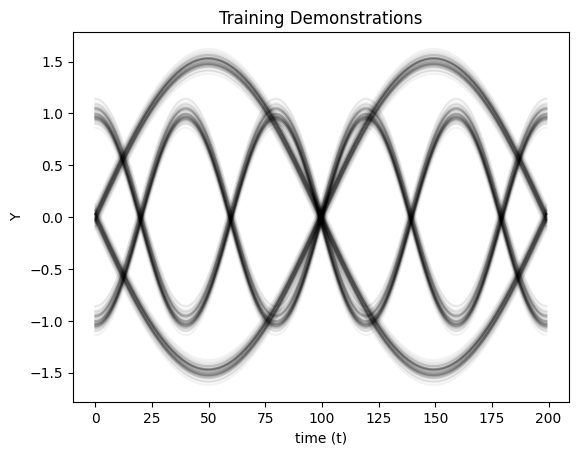

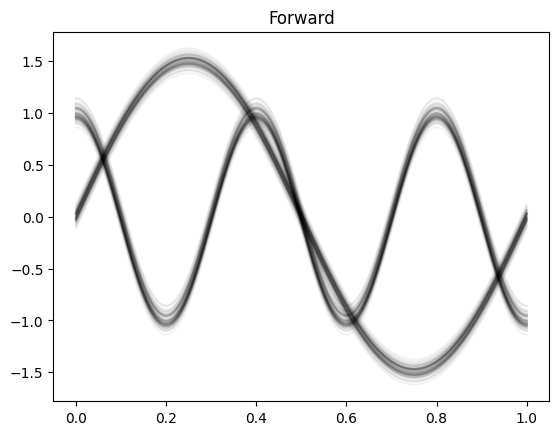

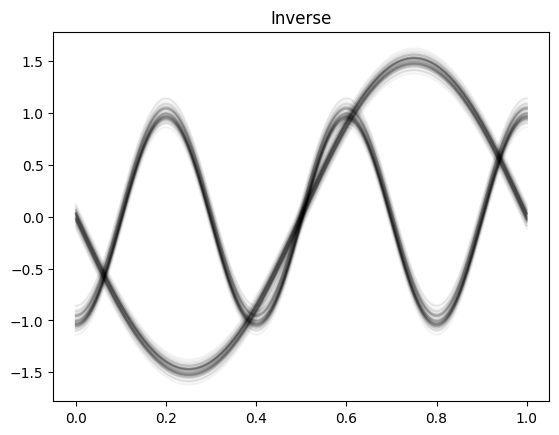

In [284]:
from cProfile import label
from re import X
from turtle import color
from sympy import li
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as D
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import math
import importlib

import dual_enc_dec_cnmp
import utils
importlib.reload(dual_enc_dec_cnmp)
importlib.reload(utils)

#params = np.array([[2,0],[2,0],[2,0],[2,0],[2,0],[-0.6,0.1],[-0.55, 0.16],[-0.5,0.23],[-0.45, 0.33],[-0.4,0.43]])
params = np.array([[20],[19.9],[19.7]])
validation_indices = [i+1 for i in range(0, 128, 8)]

X1, X2, Y1, Y2, validation_Y1, validation_Y2 = utils.generate_demonstrations(time_len=200, params = params, plot_title='Training')

In [292]:
demo_data = [X1, X2, Y1, Y2]
d_x = 1
d_y1 = 1
d_y2 = 1
OBS_MAX = 5
d_N = Y1.shape[0]
time_len = 200
validation_idx = validation_indices[0]
print(validation_idx)

model = dual_enc_dec_cnmp.DualEncoderDecoder(d_x, d_y1, d_y2).double()
optimizer = optim.Adam(model.parameters(), lr=5*1e-4)

target_demo = Y2[validation_idx]
target_demo = torch.from_numpy(target_demo.copy()).double()

errors = []
losses = []
best_mean = torch.zeros(0)
best_std = torch.zeros(0)

condition_points = [[0.0, Y1[validation_idx, :1]], [1.0, Y1[validation_idx, -1:]]]

EPOCHS = 200000

1


Epoch: 0, Loss: 2.6311498267889597
(128, 200, 1)


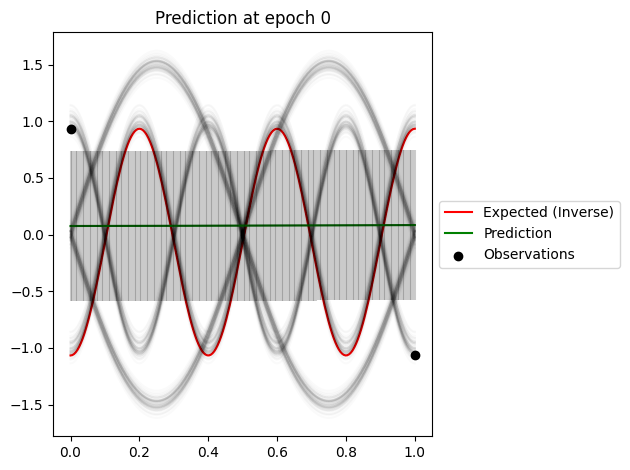

Saving model  1000
Saving model  2000
Saving model  3000
Saving model  4000
Saving model  5000
Saving model  6000
Saving model  7000
Saving model  8000
Saving model  9000
Epoch: 10000, Loss: 0.43355747274644263
(128, 200, 1)


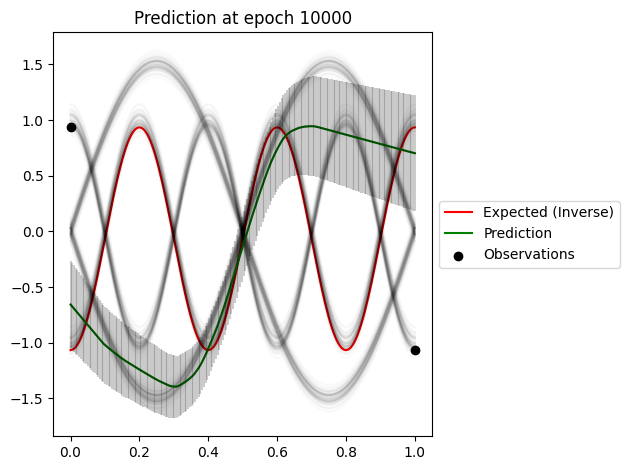

Saving model  10000
Saving model  11000
Saving model  12000
Saving model  13000
Saving model  14000
Saving model  15000
Saving model  16000
Saving model  17000
Saving model  18000
Saving model  19000
Epoch: 20000, Loss: -1.1817157766518849
(128, 200, 1)


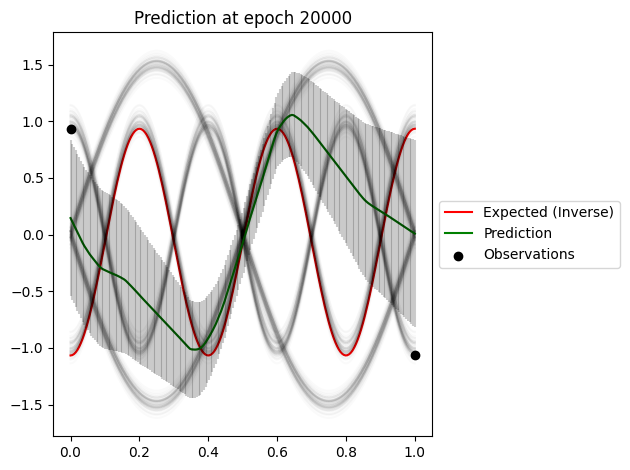

Saving model  20000
Saving model  22000
Saving model  23000
Saving model  24000
Saving model  25000
Saving model  27000
Saving model  28000
Epoch: 30000, Loss: 1.8694078568933752
(128, 200, 1)


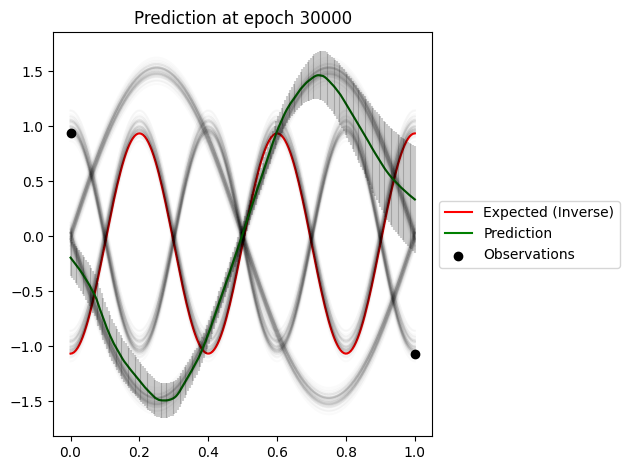

Saving model  30000
Saving model  31000
Saving model  32000
Saving model  33000
Saving model  34000
Saving model  35000
Saving model  37000
Saving model  38000
Epoch: 40000, Loss: 1.4760888974931132
(128, 200, 1)


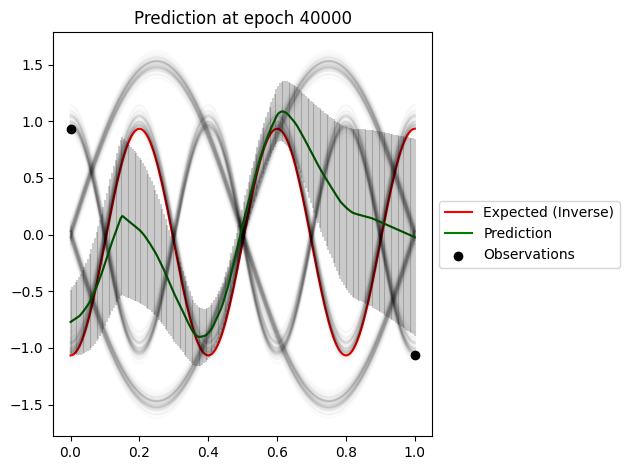

Saving model  40000
Saving model  41000
Saving model  42000
Saving model  43000
Saving model  44000
Saving model  45000
Saving model  46000
Saving model  47000
Saving model  48000
Saving model  49000
Epoch: 50000, Loss: -2.2620845419597737
(128, 200, 1)


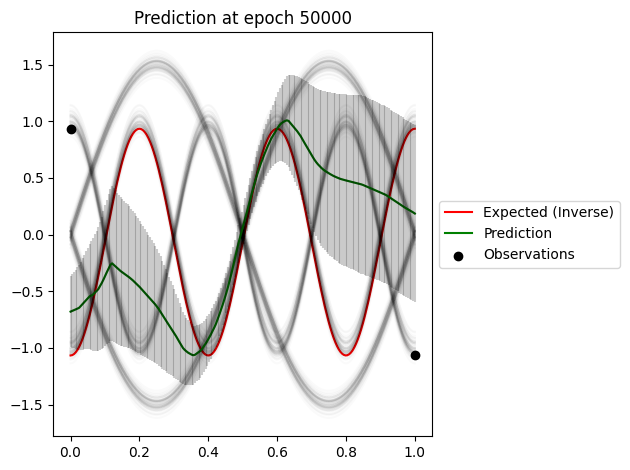

Saving model  50000
Saving model  51000
Saving model  52000
Saving model  53000
Saving model  54000
Saving model  55000
Saving model  57000
Saving model  58000
Saving model  59000
Epoch: 60000, Loss: -2.4836208617448516
(128, 200, 1)


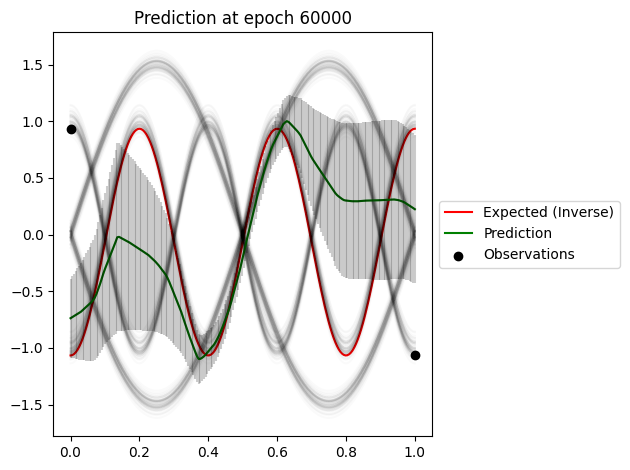

Saving model  60000
Saving model  61000
Saving model  62000
Saving model  63000
Saving model  64000
Saving model  65000
Saving model  66000
Saving model  67000
Saving model  68000
Saving model  69000
Epoch: 70000, Loss: -1.0582493325483213
(128, 200, 1)


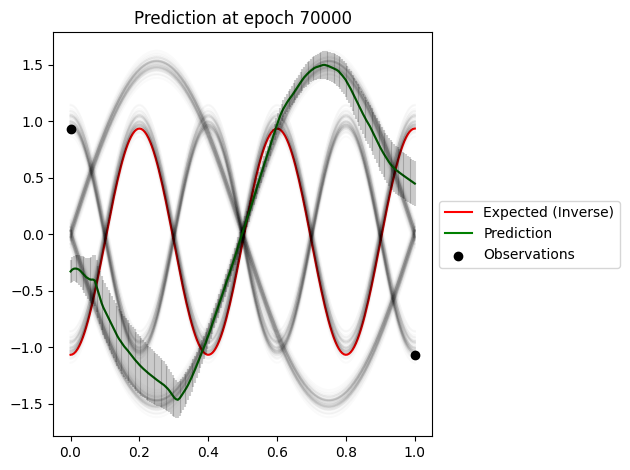

Saving model  70000
Saving model  71000
Saving model  73000
Saving model  74000
Saving model  75000
Saving model  76000
Saving model  77000
Saving model  78000
Saving model  79000
Epoch: 80000, Loss: -3.3418634444752477
(128, 200, 1)


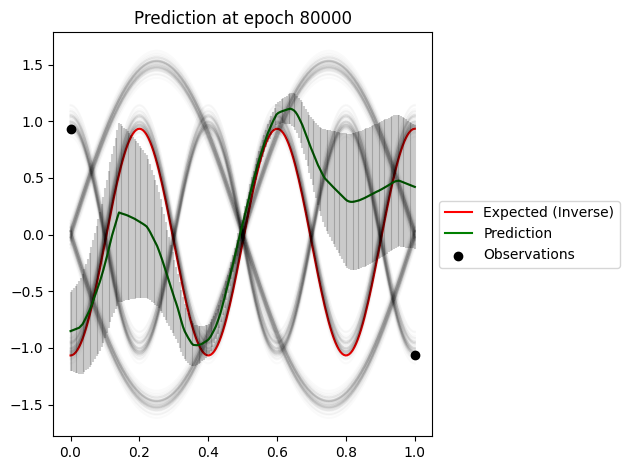

Saving model  80000
Saving model  81000
Saving model  82000
Saving model  83000
Saving model  84000
Saving model  85000
Saving model  86000
Saving model  87000
Saving model  88000
Saving model  89000
Epoch: 90000, Loss: -2.0262057648086005
(128, 200, 1)


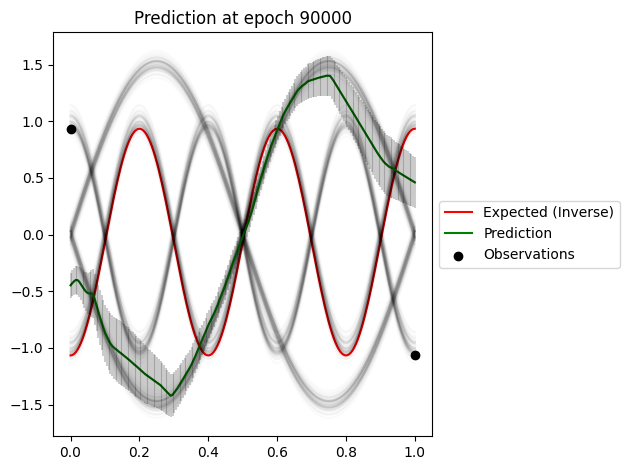

Saving model  90000
Saving model  91000
Saving model  92000
Saving model  93000
Saving model  94000
Saving model  95000
Saving model  96000
Saving model  97000
Saving model  98000
Saving model  99000
Epoch: 100000, Loss: -0.8591781816221502
(128, 200, 1)


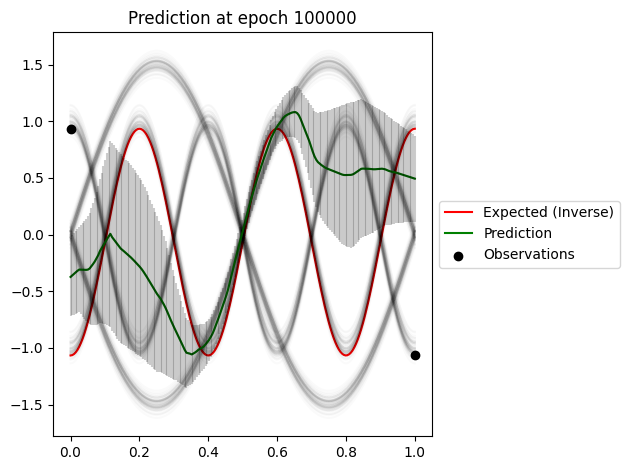

Saving model  100000
Saving model  101000
Saving model  102000
Saving model  103000
Saving model  104000
Saving model  105000
Saving model  106000
Saving model  107000
Saving model  108000
Saving model  109000
Epoch: 110000, Loss: -2.4062682898742223
(128, 200, 1)


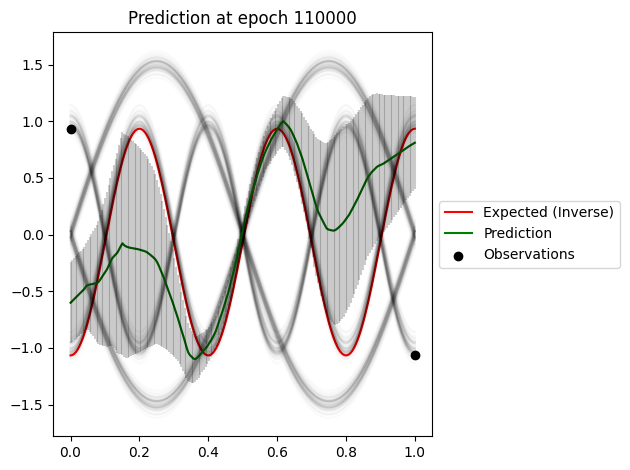

Saving model  110000
Saving model  111000
Saving model  112000
Saving model  113000
Saving model  114000
Saving model  115000
Saving model  116000
Saving model  117000
Saving model  118000
Saving model  119000
Epoch: 120000, Loss: -1.2985223872367164
(128, 200, 1)


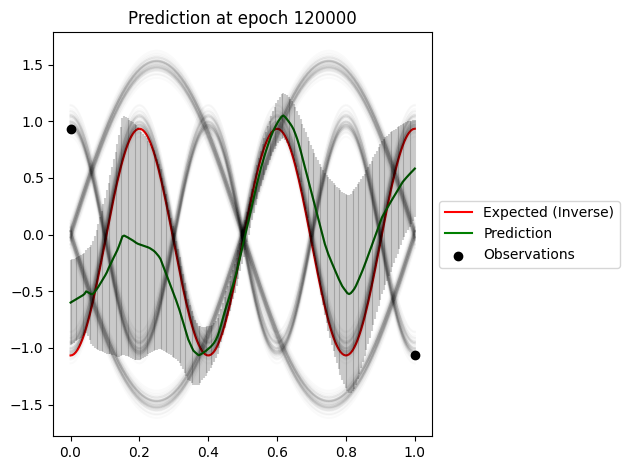

Saving model  120000
Saving model  121000
Saving model  122000
Saving model  124000
Saving model  125000
Saving model  126000
Saving model  128000
Saving model  129000
Epoch: 130000, Loss: -1.0359852882477087
(128, 200, 1)


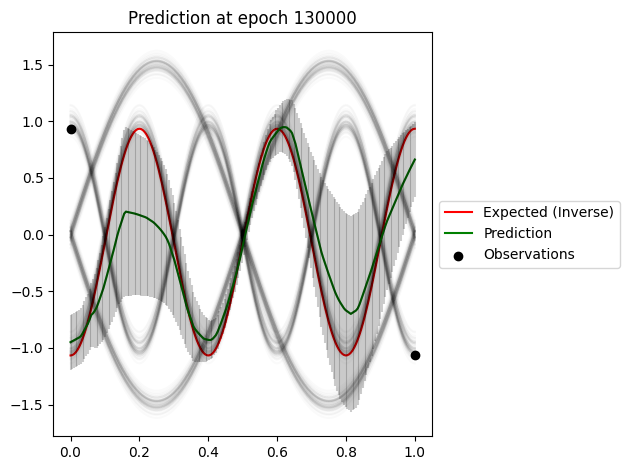

Saving model  130000
Saving model  131000
Saving model  132000
Saving model  133000
Saving model  134000
Saving model  135000
Saving model  136000
Saving model  137000
Saving model  138000
Saving model  139000
Epoch: 140000, Loss: -1.5741054772984615
(128, 200, 1)


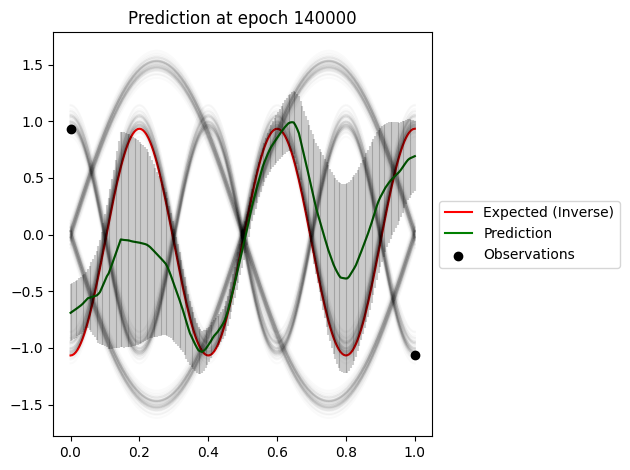

Saving model  140000
Saving model  141000
Saving model  142000
Saving model  143000
Saving model  144000
Saving model  145000
Saving model  146000
Saving model  147000
Saving model  148000
Saving model  149000
Epoch: 150000, Loss: -1.3588043186902317
(128, 200, 1)


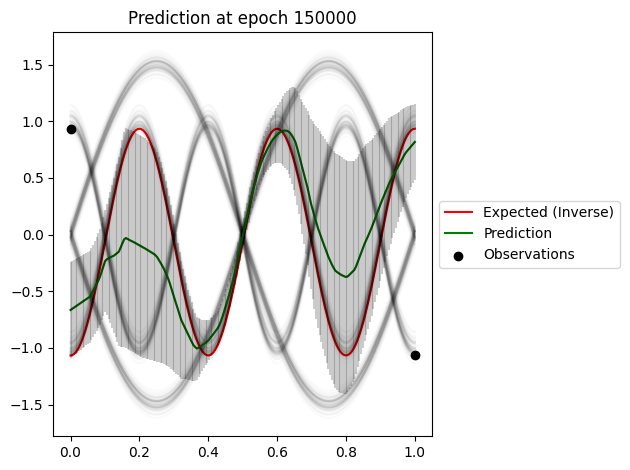

Saving model  150000
Saving model  151000
Saving model  152000
Saving model  153000
Saving model  154000
Saving model  155000
Saving model  156000
Saving model  158000
Saving model  159000
Epoch: 160000, Loss: -3.2754874998474173
(128, 200, 1)


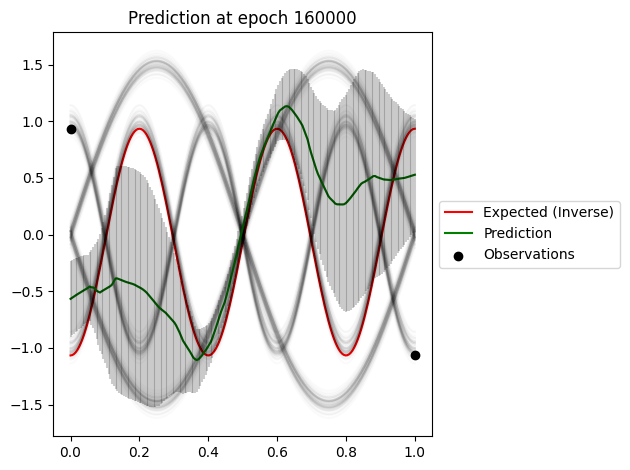

Saving model  160000
Saving model  163000
Saving model  164000
Saving model  166000
Saving model  167000
Saving model  168000
Saving model  169000
Epoch: 170000, Loss: -1.859093415664091
(128, 200, 1)


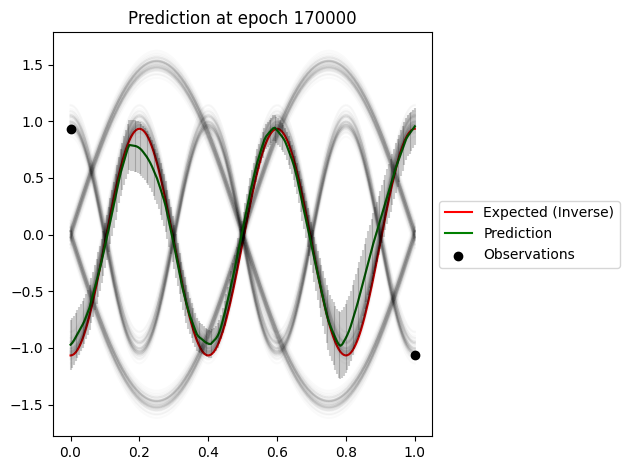

Saving model  171000
Saving model  172000
Saving model  175000
Saving model  176000
Saving model  177000
Saving model  178000
Epoch: 180000, Loss: -3.2451932476198935
(128, 200, 1)


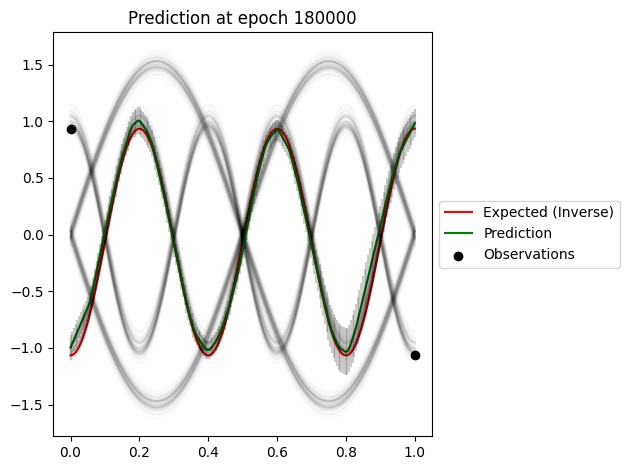

Saving model  180000
Saving model  181000
Saving model  182000
Saving model  183000
Saving model  184000
Saving model  185000
Saving model  186000
Saving model  187000
Saving model  188000
Saving model  189000
Epoch: 190000, Loss: -0.2618891319400135
(128, 200, 1)


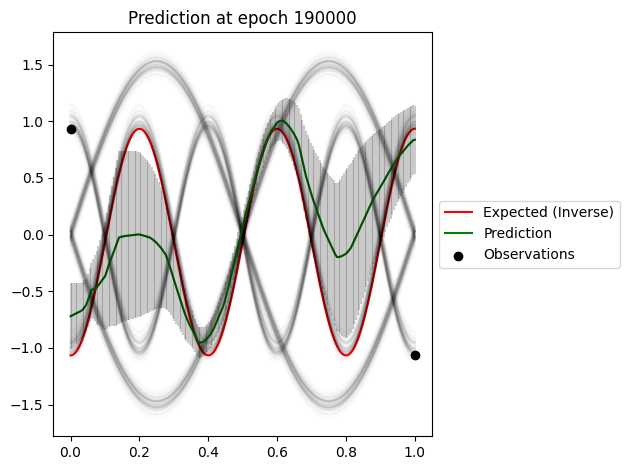

Saving model  190000
Saving model  191000
Saving model  192000
Saving model  193000
Saving model  194000
Saving model  195000
Saving model  196000
Saving model  197000
Saving model  198000
Saving model  199000


In [293]:
for i in range(EPOCHS):

    obs, x_tar, y_tar = dual_enc_dec_cnmp.get_training_sample(validation_idx, X1, Y1, X2, Y2, OBS_MAX, d_N, d_x, d_y1, d_y2, time_len)

    optimizer.zero_grad()

    output = model(obs, x_tar)
    loss = dual_enc_dec_cnmp.log_prob_loss(output, y_tar, d_y1)

    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        if i % 1000 == 0:
            if i % 10000 == 0:
                print(f'Epoch: {i}, Loss: {loss.item()}')
                means, stds = dual_enc_dec_cnmp.predict_inverse(model, validation_idx, time_len, condition_points, d_x, d_y1, d_y2, demo_data)
                errors, best_mean, best_std = utils.test_model(best_mean, best_std, means, stds, validation_idx, demo_data, errors, time_len, condition_points, i, plot=True)
                if not torch.equal(best_mean, means):
                    print('Saving model ', i)
                    torch.save(model.state_dict(), 'inverse_best_model.pth')
                losses.append(loss.item())
                continue
            means, stds = dual_enc_dec_cnmp.predict_inverse(model, validation_idx, time_len, condition_points, d_x, d_y1, d_y2, demo_data)
            errors, best_mean, best_std = utils.test_model(best_mean, best_std, means, stds, validation_idx, demo_data, errors, time_len, condition_points, i, plot=False)
            if not torch.equal(best_mean, means):
                    print('Saving model ', i)
                    torch.save(model.state_dict(), 'inverse_best_model.pth')
            losses.append(loss.item())
            continue
        losses.append(loss.item())

/var/folders/63/kw9gvntx3hzftcn6fp7wkf0c0000gn/T/ipykernel_19944/2518946450.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load('invers

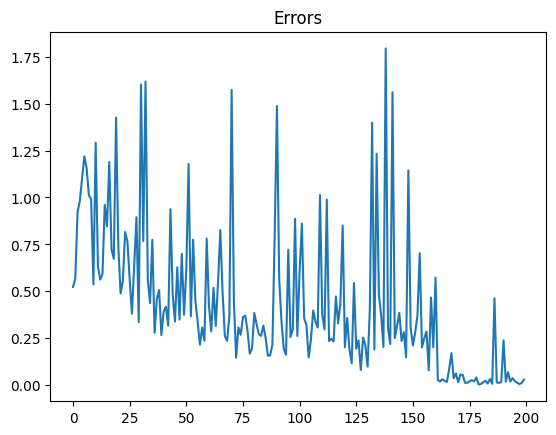

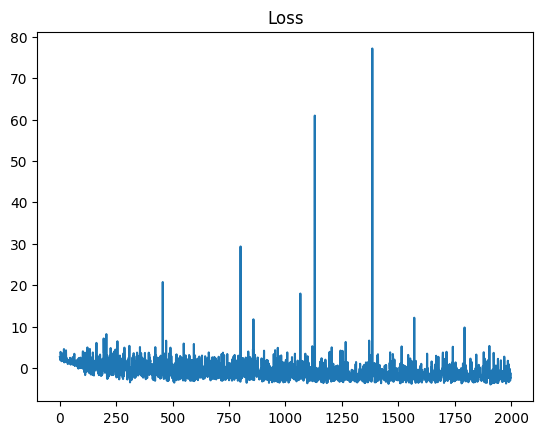

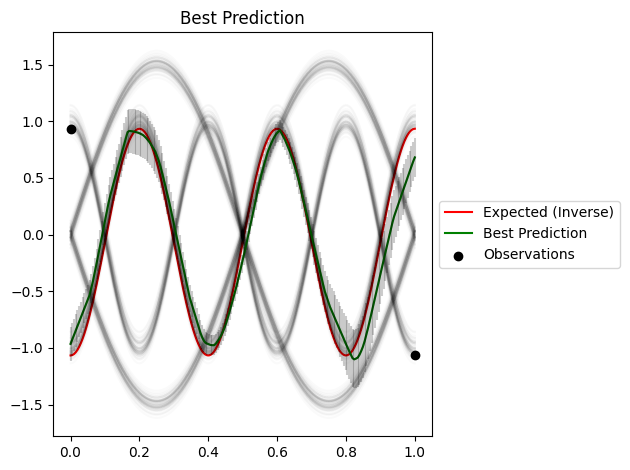

In [294]:

best_model = dual_enc_dec_cnmp.DualEncoderDecoder(d_x, d_y1, d_y2).double()
best_model.load_state_dict(torch.load('inverse_best_model.pth'))
means, stds = dual_enc_dec_cnmp.predict_inverse(best_model, validation_idx, time_len, condition_points, d_x, d_y1, d_y2, demo_data)
utils.plot_results(means, stds, Y1, Y2, validation_idx, condition_points, errors, losses, time_len, d_N)